In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn.utils import resample

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# for feature selection
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('forest_fire.csv')
df_base = df

In [3]:
df_base.shape

(55367, 43)

In [4]:
df.cont_clean_date.isna().sum()

27890

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [6]:
df.shape

(55367, 43)

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


Things to get rid of
* fire_size
* fire_mag
* fire name
* columns where weather file not found (rows)
* putout_time
* disc_date_final
* cont_clean_date
* wstation
* weather_file

## Dropping columns

In [8]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'fire_name','cont_clean_date', 'disc_date_final', 'cont_date_final', 
           'putout_time', 'disc_date_pre', 'disc_pre_year', 
           'disc_pre_month', 'wstation_usaf', 'dstation_m',
           'wstation_wban', 'wstation_byear', 'wstation_eyear',
           'fire_mag', 'weather_file', 'Temp_cont','Hum_cont','Prec_cont','Wind_cont']

In [9]:
df = df.drop(columns=to_drop)

In [10]:
df.shape

(55367, 22)

## Getting rid of null rows

In [12]:
df = df[(df.Temp_pre_7 != -1)]

In [13]:
df.shape

(41132, 22)

# Chaning Temp to F

In [14]:
df.head(0)

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness


In [15]:
def c_to_f(c):
    return (c * 9/5) + 32

df.loc[:,'Temp_pre_30':'Temp_pre_7'] = df.loc[:,'Temp_pre_30':'Temp_pre_7'].applymap(lambda x: c_to_f(x))

# Looking at temp values

In [16]:
df.sort_values(by='Temp_pre_30').head()

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness
49511,2.0,B,Arson,36.265167,-83.725630,TN,11/30/2007,Nov,0,-56.578947,32.00,32.0,0.405263,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.148579
25616,1.0,B,Structure,36.320033,-83.412400,TN,11/30/2007,Nov,0,-56.578947,32.00,32.0,0.405263,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.145745
34338,2.0,B,Miscellaneous,37.381944,-120.548889,CA,11/10/2001,Nov,0,-1.840000,-1.84,32.0,7.000000,7.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.501252
44336,20.0,C,Miscellaneous,38.033680,-91.511590,MO,1/29/2014,Jan,0,3.058298,32.00,32.0,3.489362,0.0,0.0,78.234043,0.0,0.0,0.0,0.0,0.0,0.218370
20710,5.0,B,Debris Burning,36.756600,-83.930820,KY,11/29/2007,Nov,0,3.827907,32.00,32.0,0.248837,0.0,0.0,5.625000,0.0,0.0,0.0,0.0,0.0,0.150136


In [17]:
df.stat_cause_descr.value_counts()

Debris Burning       10720
Arson                 6848
Lightning             6467
Miscellaneous         6345
Missing/Undefined     3361
Equipment Use         3219
Campfire              1030
Children               955
Smoking                852
Railroad               694
Powerline              408
Fireworks              175
Structure               58
Name: stat_cause_descr, dtype: int64

# Size Binned into large small

In [18]:
cond = [
    df.fire_size_class.isin(['A','B','C']),
    df.fire_size_class.isin(['D','E','F','G'])
]
out = [
    0,
    1
]

df['size_bin'] = np.select(cond,out)

In [19]:
df.size_bin.value_counts()

0    34739
1     6393
Name: size_bin, dtype: int64

# Size changed to numbers

In [20]:
cond = [
    df.fire_size_class == 'A',
    df.fire_size_class == 'B',
    df.fire_size_class == 'C',
    df.fire_size_class == 'D',
    df.fire_size_class == 'E',
    df.fire_size_class == 'F',
    df.fire_size_class == 'G',
]
out = [
    1,
    2,
    3,
    4,
    5,
    6,
    7
]

df['size_number'] = np.select(cond,out)

In [21]:
df.groupby('size_bin').median()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_number
size_bin,,,,,,,,,,,,,,,,,,
0,2.81,34.2833,-89.940112,12,56.850664,57.418167,58.083832,2.926353,2.849444,2.777143,64.255981,62.283293,60.304668,0.8,0.0,0.0,0.207162,2
1,5000.00,39.7747,-112.258600,12,65.486704,66.475657,67.718947,3.177127,3.084722,2.958974,47.059420,44.774194,42.640351,0.0,0.0,0.0,0.247924,7


# looking at correlations to binned

In [22]:
df.corrwith(df['size_bin']).abs().sort_values(ascending=False)

size_bin       1.000000
size_number    0.922111
longitude      0.426884
fire_size      0.347112
latitude       0.305982
Hum_pre_30     0.218659
Hum_pre_15     0.182686
Hum_pre_7      0.172894
Vegetation     0.134180
remoteness     0.132204
Temp_pre_7     0.126384
Temp_pre_15    0.117108
Temp_pre_30    0.104931
Prec_pre_30    0.067091
Wind_pre_15    0.058880
Prec_pre_15    0.058544
Wind_pre_30    0.056043
Wind_pre_7     0.049791
Prec_pre_7     0.041559
dtype: float64

# Looking at temp/hum/veg/long
# versus size of fire

Text(0.5, 1.0, 'long')

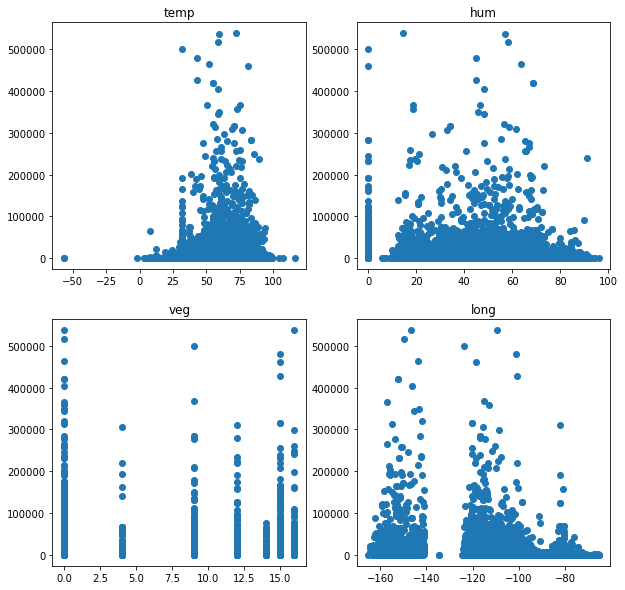

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2,2)
y = df.fire_size
x1 = df.Temp_pre_30
x2 = df.Hum_pre_30
x3 = df.Vegetation
x4 = df.longitude
ax[0,0].scatter(x1,y)
ax[0,0].set_title('temp')
ax[0,1].scatter(x2,y)
ax[0,1].set_title('hum')
ax[1,0].scatter(x3,y)
ax[1,0].set_title('veg')
ax[1,1].scatter(x4,y)
ax[1,1].set_title('long')

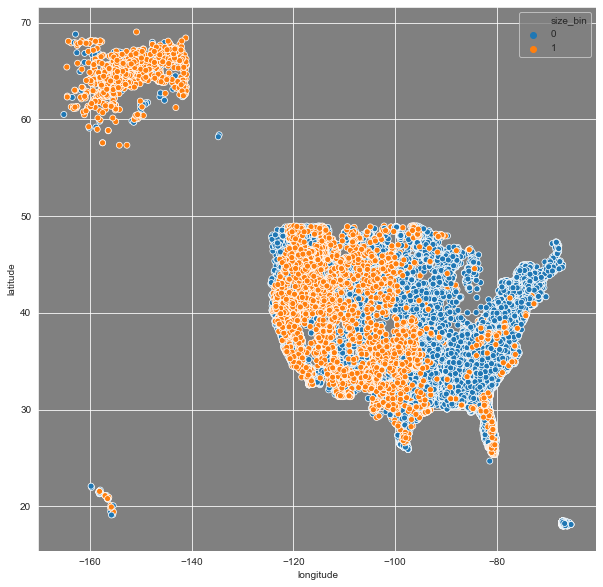

In [24]:
sns.set_style("darkgrid", {"axes.facecolor": "0.5"})

x = df.longitude
y = df.latitude

fig = plt.figure(figsize=(10,10))
ax = fig.subplots
ax = sns.scatterplot(x=x, y=y,
              hue=df.size_bin,
              data=df);

In [25]:
df[(df.longitude > -100)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number
count,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000
mean,261.012158,34.505882,-87.281956,11.738756,56.520210,56.657091,56.865570,2.866276,2.744797,2.684001,60.760137,57.022509,54.843669,45.187438,20.233123,8.277663,0.189343,0.054429,2.395523
std,3500.547587,5.038284,7.327966,4.958158,16.477458,16.729294,17.033338,1.326887,1.460028,1.554731,20.064796,23.106616,24.172601,146.624101,73.196111,39.272324,0.085127,0.226866,0.843514
min,0.510000,17.958364,-99.992100,0.000000,-56.578947,-34.600000,-3.228036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,2.000000
25%,1.000000,31.613785,-94.023992,12.000000,44.379801,44.082376,43.857466,2.122092,1.942799,1.778142,59.914151,56.619482,52.862275,0.000000,0.000000,0.000000,0.135392,0.000000,2.000000
50%,3.000000,33.704895,-87.532935,12.000000,54.425094,55.036382,55.780656,2.894432,2.811508,2.741818,66.086481,64.300202,62.649528,2.900000,0.000000,0.000000,0.186469,0.000000,2.000000
75%,10.000000,36.319445,-81.773858,15.000000,71.066289,70.915619,71.262332,3.676556,3.664532,3.668655,71.199285,70.272242,69.645888,55.400000,20.100000,3.300000,0.245540,0.000000,3.000000
max,309200.000000,48.998667,-65.417709,16.000000,94.100000,94.280000,106.100000,25.700000,25.700000,25.700000,96.000000,94.000000,96.000000,13560.800000,2527.000000,1638.000000,0.829507,1.000000,7.000000


In [26]:
df[(df.longitude < -100)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number
count,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000
mean,7063.782596,41.125832,-116.064690,9.419722,63.300654,63.895159,64.270827,3.112180,3.028419,2.932784,42.066297,40.375438,38.956224,13.101738,6.005215,2.793953,0.375196,0.396655,3.870747
std,26809.875329,8.093984,12.279053,6.558648,15.478596,15.919912,16.416185,1.571309,1.623069,1.663134,21.072613,21.619274,21.941456,63.407021,39.831831,26.185701,0.175113,0.489223,2.131417
min,0.520000,19.099096,-165.116700,0.000000,-1.840000,-1.840000,-5.522988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,35.386415,-120.370373,0.000000,55.309852,55.623087,55.704821,2.260581,2.138452,1.995065,30.610511,28.016894,26.167166,0.000000,0.000000,0.000000,0.304180,0.000000,2.000000
50%,15.000000,39.900556,-115.108900,12.000000,66.809684,67.548747,68.085714,3.136111,3.070819,2.954592,44.307513,42.863168,41.017857,0.000000,0.000000,0.000000,0.402115,0.000000,3.000000
75%,4532.500000,44.740790,-108.369095,15.000000,74.272198,75.195134,76.035283,4.086306,4.040346,3.967857,56.626744,55.216517,54.073182,9.200000,2.100000,0.000000,0.491952,1.000000,6.000000
max,538049.000000,69.047200,-100.000648,16.000000,115.880000,124.822034,131.000000,29.800000,29.800000,21.100000,94.000000,94.000000,94.000000,1898.000000,1273.000000,1187.000000,1.000000,1.000000,7.000000


In [27]:
df[(df.longitude < -130)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,29715.856339,61.410528,-152.134369,0.868597,55.401608,57.300508,59.756866,2.389291,2.339999,2.232417,53.234257,52.762169,50.212736,11.539087,5.942539,2.539644,0.707071,0.810690,5.883073
std,60817.327495,11.429742,5.898118,3.111186,11.012658,11.230272,11.931415,1.147756,1.220089,1.290806,20.311615,20.967389,21.207397,39.771228,18.335686,10.937513,0.115661,0.391973,1.850223
min,0.600000,19.099096,-165.116700,0.000000,15.934577,10.016501,9.698182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524072,0.000000,2.000000
25%,3262.000000,63.118902,-157.114150,0.000000,49.741625,52.445421,55.062881,1.841163,1.752853,1.553747,50.815439,48.950669,44.702761,0.000000,0.000000,0.000000,0.625366,1.000000,6.000000
50%,8651.450000,64.467183,-152.516700,0.000000,56.453984,58.455678,61.458510,2.315268,2.233588,2.127530,57.795039,57.893000,54.302157,0.000000,0.000000,0.000000,0.692177,1.000000,7.000000
75%,25790.325000,65.803500,-147.389500,0.000000,60.865302,63.094779,67.138497,3.000252,2.999772,2.845637,65.293437,66.079293,64.242082,12.675000,5.900000,0.300000,0.776666,1.000000,7.000000
max,537627.000000,69.047200,-134.583333,12.000000,107.020075,124.822034,125.626087,7.851200,7.868947,8.539474,86.010355,85.278932,86.272727,912.400000,278.400000,167.700000,1.000000,1.000000,7.000000


- temps right in between 10 and 30 are the sweet spot for big fires
- humidity does have a similar trend but not so much, there is a strange thing happening in between 140 and 120 long
    - there are lot of big fires in alaska < -130 long
- larger fires happen on west coast more


# Wind Outlier Fixing

In [ ]:
df.Wind_cont.sort_values(ascending=False).head(50)

In [ ]:
df[(df.Temp_pre_30==32)].size_bin.value_counts()

In [ ]:
df[(df.Temp_pre_7==32)].describe()

In [ ]:
#test = df[(df.Temp_pre_30!=float(32))| (df.Temp_pre_15!=float(32)) | (df.Temp_pre_7!=float(32)) | (df.Temp_cont!=float(32))]

# Getting Rid of Tempurature Outliers

In [28]:
test = df[(df.Temp_pre_30!=float(32))]
print(test.shape)
test = test[(df.Temp_pre_15!=float(32))]
print(test.shape)
test = test[(df.Temp_pre_7!=float(32))]
print(test.shape)

(38575, 24)
(37194, 24)
(36535, 24)


In [29]:
test.describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number
count,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000,36535.000000
mean,2333.094280,36.660711,-95.897825,11.043602,60.836480,61.780976,62.454035,3.142058,3.129052,3.104218,58.613043,57.609115,56.462198,39.472134,17.989741,7.496871,0.244771,0.158232,2.842671
std,15370.623847,6.901523,16.099409,5.584928,15.342448,15.073362,15.131889,1.200735,1.248833,1.332299,17.258248,17.601590,18.070949,135.670076,69.206011,38.111117,0.147181,0.364963,1.528901
min,0.510000,17.958364,-165.116700,0.000000,6.510518,0.736096,-5.522988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.150000,32.446761,-104.761750,9.000000,49.089291,50.133548,50.828285,2.333406,2.285050,2.202799,53.025187,51.308131,48.821073,0.000000,0.000000,0.000000,0.140430,0.000000,2.000000
50%,4.000000,34.815135,-93.251333,12.000000,60.906686,61.827082,62.792857,3.062696,3.044966,2.997159,63.548101,62.273349,60.682353,3.000000,0.000000,0.000000,0.210037,0.000000,2.000000
75%,21.000000,40.335693,-83.646370,15.000000,73.949175,74.615478,75.221471,3.864361,3.872146,3.883929,69.784996,69.284457,68.708757,43.500000,15.600000,2.500000,0.294780,0.000000,3.000000
max,538049.000000,69.047200,-65.417709,16.000000,115.880000,124.822034,131.000000,25.700000,25.700000,25.700000,94.000000,94.000000,96.000000,13560.800000,2527.000000,1638.000000,1.000000,1.000000,7.000000


In [30]:
test.shape

(36535, 24)

In [31]:
test.Temp_pre_30.value_counts()

76.392253     9
71.600000     8
86.504000     8
73.687606     8
56.453984     8
             ..
57.534095     1
81.578966     1
63.824742     1
76.776685     1
104.000000    1
Name: Temp_pre_30, Length: 33753, dtype: int64

In [32]:
test.size_bin.value_counts()

0    30754
1     5781
Name: size_bin, dtype: int64

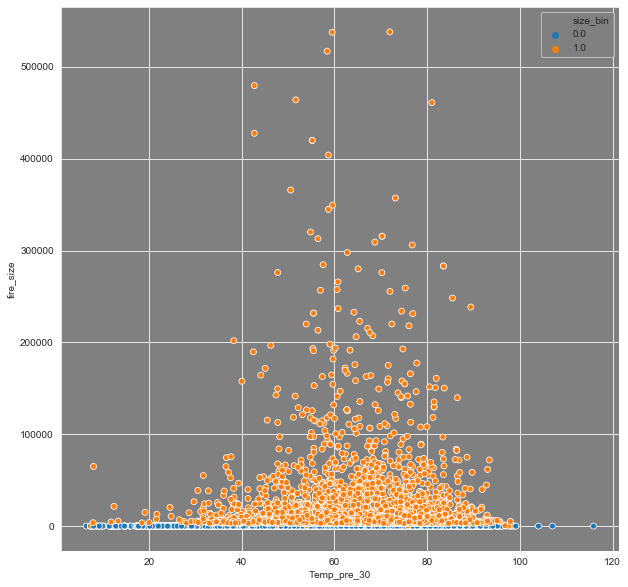

In [33]:
sns.set_style("darkgrid", {"axes.facecolor": "0.5"})

x = df.Temp_pre_30
y = df.fire_size

fig = plt.figure(figsize=(10,10))
ax = fig.subplots
ax = sns.scatterplot(x=x, y=y,
          hue=test.size_bin,
          data=test);

# Negatives

In [34]:
df[(df.Temp_pre_30<33)].size_bin.value_counts(normalize=True)

0    0.858486
1    0.141514
Name: size_bin, dtype: float64

In [35]:
df.head(0)

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number


In [36]:
df = test

# Feature Engineering
- [x] cold_front (cold for a certain amount of days)
- > if_rain (if it has rained)
- > binning tempuratures
- > dummy discovery month
- > bin some longitudes
- > west coast (longitude bin)
- > dummy states (individual states or regions)
- > dummy vegitation
- [x]is_very_windy (wind over 30 days more than x)
- is_humid (over/under some value)
- is_remote (over 0.x is remote)

# Is Rain

In [37]:
df.loc[:,'Prec_pre_30':'Prec_pre_7'].describe()

,Prec_pre_30,Prec_pre_15,Prec_pre_7
count,36535.000000,36535.000000,36535.000000
mean,39.472134,17.989741,7.496871
std,135.670076,69.206011,38.111117
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,43.500000,15.600000,2.500000
max,13560.800000,2527.000000,1638.000000


In [38]:
cond = [
    (df['Prec_pre_7'] != 0) | (df['Prec_pre_15'] != 0) | (df['Prec_pre_30'] != 0) 
]
choice = [
    1
]
df['did_rain'] = np.select(cond,choice,default=0)

In [39]:
df['did_rain'].value_counts()

1    20276
0    16259
Name: did_rain, dtype: int64

# Binning Temps

In [42]:
df.loc[:,'Temp_pre_30':'Temp_pre_7'].describe()

,Temp_pre_30,Temp_pre_15,Temp_pre_7
count,36535.000000,36535.000000,36535.000000
mean,60.836480,61.780976,62.454035
std,15.342448,15.073362,15.131889
min,6.510518,0.736096,-5.522988
25%,49.089291,50.133548,50.828285
50%,60.906686,61.827082,62.792857
75%,73.949175,74.615478,75.221471
max,115.880000,124.822034,131.000000


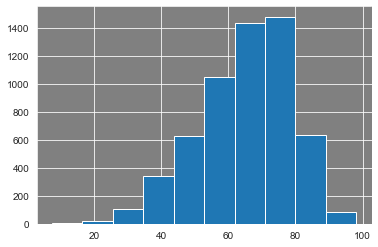

In [40]:
df[(df.size_bin == 1)].Temp_pre_30.hist()

In [ ]:
np.quantile(df.Temp_pre_30,0.75)

In [76]:
cond = [
    df.Temp_pre_30 <= np.quantile(df.Temp_pre_30,0.25),
    df.Temp_pre_30 <= np.quantile(df.Temp_pre_30,0.5),
    df.Temp_pre_30 <= np.quantile(df.Temp_pre_30,0.75),
    df.Temp_pre_30 <= np.quantile(df.Temp_pre_30,1),
]
out = [
    0,
    1,
    2,
    3
]
df['Temp_pre_30_bin'] = np.select(cond,out)

cond = [
    df.Temp_pre_15 <= np.quantile(df.Temp_pre_15,0.25),
    df.Temp_pre_15 <= np.quantile(df.Temp_pre_15,0.5),
    df.Temp_pre_15 <= np.quantile(df.Temp_pre_15,0.75),
    df.Temp_pre_15 <= np.quantile(df.Temp_pre_15,1),
]
out = [
    0,
    1,
    2,
    3
]
df['Temp_pre_15_bin'] = np.select(cond,out)

cond = [
    df.Temp_pre_7 <= np.quantile(df.Temp_pre_7,0.25),
    df.Temp_pre_7 <= np.quantile(df.Temp_pre_7,0.5),
    df.Temp_pre_7 <= np.quantile(df.Temp_pre_7,0.75),
    df.Temp_pre_7 <= np.quantile(df.Temp_pre_7,1),
]
out = [
    0,
    1,
    2,
    3
]
df['Temp_pre_7_bin'] = np.select(cond,out)

# Binning Longitudes

In [79]:
cond = [
    df.longitude <= np.quantile(df.longitude,0.25),
    df.longitude <= np.quantile(df.longitude,0.5),
    df.longitude <= np.quantile(df.longitude,0.75),
    df.longitude <= np.quantile(df.longitude,1),
]
out = [
    0,
    1,
    2,
    3
]
df['longitude_bin'] = np.select(cond,out)

# West Coast

Long < -130 = Alaska and Hawaiit
Long < -100 = Middle of Texas and left

In [80]:
df[(df.longitude < -130)]['size_bin'].value_counts()

1    678
0    157
Name: size_bin, dtype: int64

In [81]:
df[(df.longitude < -100)]['size_bin'].value_counts()

0    6546
1    4373
Name: size_bin, dtype: int64

In [82]:
df['west_coast'] = df.longitude.apply(lambda x: 1 if x < -100 else 0)

In [83]:
df.groupby(['west_coast']).mean()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,size_bin,size_number,did_rain,Temp_pre_30_bin,Temp_pre_15_bin,Temp_pre_7_bin,longitude_bin
west_coast,,,,,,,,,,,,,,,,,,,,,,,,
0,262.35217,34.685091,-87.285072,11.707644,58.662454,59.555415,60.142669,3.053694,3.050726,3.037615,64.300531,63.273927,62.068894,50.122322,22.814530,9.368457,0.189363,0.054966,2.397017,0.567458,1.340139,1.336430,1.328623,2.069683
1,7191.06020,41.295518,-116.103365,9.485759,65.936749,67.002148,67.876506,3.349361,3.312805,3.260470,45.270183,44.319451,43.308875,14.486766,6.670776,3.106127,0.374760,0.400495,3.888177,0.525689,1.874989,1.883689,1.901823,0.163477


# Is Very Windy

In [94]:
df[(df.size_bin==1)].Wind_pre_30.describe()

count    5781.000000
mean        3.357100
std         1.368609
min         0.000000
25%         2.459856
50%         3.303429
75%         4.217186
max        25.700000
Name: Wind_pre_30, dtype: float64

In [95]:
df['very_windy_30'] = df.Wind_pre_30.apply(lambda x: 1 if x > 4 else 0)
df['very_windy_15'] = df.Wind_pre_30.apply(lambda x: 1 if x > 4 else 0)
df['very_windy_7'] = df.Wind_pre_30.apply(lambda x: 1 if x > 4 else 0)

# Low Humid

In [96]:
df[(df.size_bin==1)].Hum_pre_30.describe()

count    5781.000000
mean       46.994060
std        18.984875
min         0.000000
25%        35.578521
50%        48.424863
75%        61.575581
max        91.600000
Name: Hum_pre_30, dtype: float64

In [97]:
df[(df.size_bin==0)].Hum_pre_30.describe()

count    30754.000000
mean        60.797128
std         15.998351
min          0.000000
25%         57.248884
50%         64.849715
75%         70.438335
max         94.000000
Name: Hum_pre_30, dtype: float64

In [98]:
df['low_humid_30'] = df.Hum_pre_30.apply(lambda x: 1 if x < 50 else 0)
df['low_humid_15'] = df.Hum_pre_15.apply(lambda x: 1 if x < 50 else 0)
df['low_humid_7'] = df.Hum_pre_7.apply(lambda x: 1 if x < 50 else 0)

# Baseline Models

In [ ]:
# fitting all 3 models
X = df[final_features]
y = df['default']
# train test split + scaler info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Logistic

In [ ]:
def LogRegTest(input_x,input_y):
    lr = LogisticRegression(random_state=1,C=1e9)
    lr.fit(input_x,input_y)
    pred_train = lr.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=2,C=1e9,class_weight='balanced',penalty='l2')

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)



## Knn

In [ ]:
def KnnTest(input_x,input_y):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(input_x,input_y)
    pred_train = knn.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1,algorithm='auto',weights='uniform')

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)

y_pred_test = knn.predict(X_test)


## D-Tree

In [ ]:
def DTreeTest(input_x,input_y):
    tree = DecisionTreeClassifier()
    tree.fit(input_x,input_y)
    pred_train = tree.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=12, min_samples_split=17,criterion='gini',min_samples_leaf=4)

tree = tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)

pred_test = tree.predict(X_test)